<a href="https://colab.research.google.com/github/MartinSantaGitHub/python-ml-course/blob/master/code/T11%20-%201%20-%20TensorFlow101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción a Tensor Flow

In [50]:
%tensorflow_version 1.x

In [88]:
import os
import numpy as np
import tensorflow as tf
import skimage.io as imd
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
print(tf.__version__)

1.15.2


In [53]:
x1 = tf.constant([1,2,3,4,5])
x2 = tf.constant([6,7,8,9,10])

In [54]:
res = tf.multiply(x1,x2)
res

<tf.Tensor 'Mul_1:0' shape=(5,) dtype=int32>

In [55]:
print(res)

Tensor("Mul_1:0", shape=(5,), dtype=int32)


In [56]:
res.dtype

tf.int32

In [57]:
sess = tf.Session()
print(sess.run(res))
sess.close()

[ 6 14 24 36 50]


In [58]:
with tf.Session() as sess:
  output = sess.run(res)
  print(output)

[ 6 14 24 36 50]


In [59]:
config = tf.ConfigProto(log_device_placement = True)
config = tf.ConfigProto(allow_soft_placement = True)

# Aprendizaje neuronal de las señales de tráfico

In [60]:
def load_ml_data(data_directory):
  dirs = [d for d in os.listdir(data_directory) if os.path.isdir(os.path.join(data_directory,d))]

  labels = []
  images = []

  for d in dirs:
    label_dir = os.path.join(data_directory,d)
    file_names = [os.path.join(label_dir,f) for f in os.listdir(label_dir) if f.endswith(".ppm")]

    for f in file_names:
      images.append(imd.imread(f))
      labels.append(int(d))
  
  return images, labels

In [61]:
main_dir = "/content/drive/My Drive/datasets/belgian/"
train_data_dir = os.path.join(main_dir,"Training")
test_data_dir = os.path.join(main_dir,"Testing")

In [64]:
images, labels = load_ml_data(train_data_dir)

In [65]:
len(images)

4575

In [73]:
images = np.array(images)

In [72]:
labels = np.array(labels)

In [74]:
images.size

4575

In [75]:
images.ndim

1

In [79]:
images[0]

array([[[ 39,  38,  37],
        [ 37,  36,  36],
        [ 35,  36,  34],
        ...,
        [ 28,  26,  26],
        [ 27,  25,  25],
        [ 27,  25,  25]],

       [[ 37,  36,  35],
        [ 36,  36,  34],
        [ 35,  36,  34],
        ...,
        [ 28,  26,  26],
        [ 28,  26,  26],
        [ 26,  24,  24]],

       [[ 35,  34,  32],
        [ 35,  35,  32],
        [ 36,  37,  33],
        ...,
        [ 27,  25,  26],
        [ 28,  26,  26],
        [ 25,  23,  24]],

       ...,

       [[ 50,  46,  40],
        [ 50,  46,  39],
        [ 50,  46,  39],
        ...,
        [ 84, 100,  57],
        [ 84,  98,  55],
        [ 86,  98,  55]],

       [[ 52,  48,  42],
        [ 51,  48,  41],
        [ 51,  47,  40],
        ...,
        [ 83, 100,  58],
        [ 84,  99,  57],
        [ 87,  99,  57]],

       [[ 53,  48,  43],
        [ 52,  48,  42],
        [ 51,  48,  41],
        ...,
        [ 75,  91,  51],
        [ 77,  90,  51],
        [ 80,  91,  52]]

In [83]:
len(set(labels))

62

In [81]:
labels[0]

6

In [84]:
images.flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : True
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

In [85]:
images.itemsize

8

In [86]:
images.nbytes

36600

In [87]:
images.nbytes / images.itemsize

4575.0

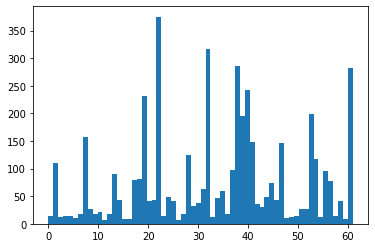

In [90]:
plt.hist(labels,len(set(labels)))
plt.show()